<a href="https://colab.research.google.com/github/fleminpaul/MachineLearning/blob/main/LinearAlgebra-5%5CPerceptron%5Cperceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [82]:
x,y=datasets.make_blobs(n_samples=200,n_features=2,centers=[[2,2],[10,10]],cluster_std=2)

<Axes: >

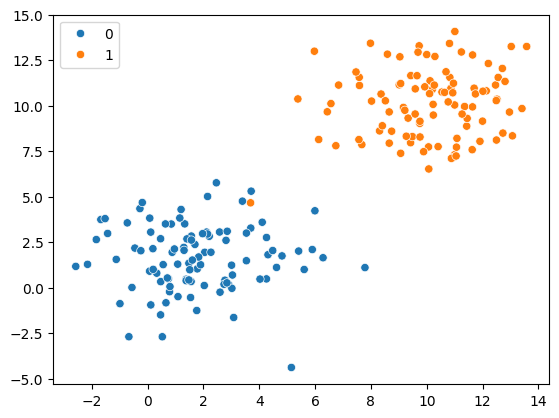

In [83]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [84]:
x_values = np.linspace(x[:,0].min(),x[:,0].max(),100)

In [85]:
W=np.array([1,1])
W0=1

In [86]:
#w1x+w2y+w0=0
#y=(-w0-w1x)/w2

y_values=(-W[0]*x_values-W0)/W[1]


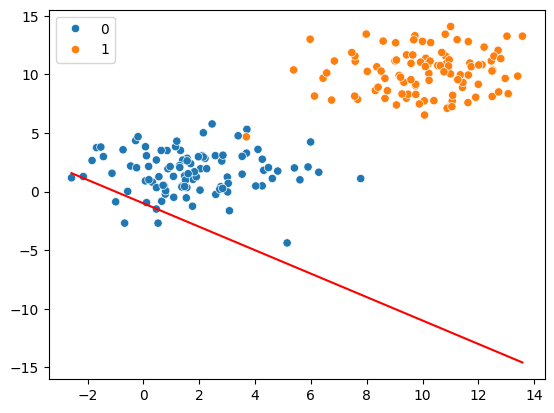

In [87]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
plt.plot(x_values,y_values,c='r')
plt.show()

In [88]:
def plot_line(W,W0,x,y):
  x_values = np.linspace(x[:,0].min(),x[:,0].max(),100)
  y_values=(-W[0]*x_values-W0)/W[1]
  sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
  plt.plot(x_values,y_values,c='r')
  plt.show()

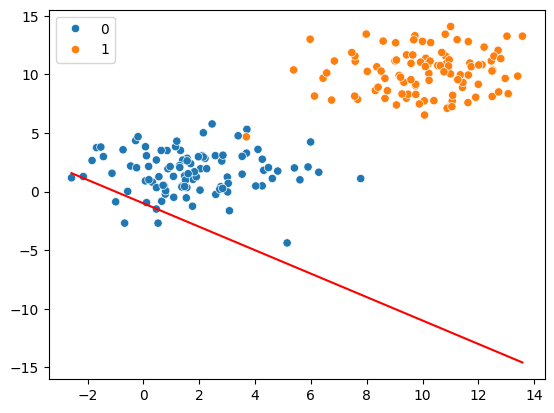

In [89]:
plot_line(W,W0,x,y)

In [90]:
# We are going to update W vector and W0, when there is a misclassification
# How to identify misclassification? - when sign of distance not equal to actual sign

In [91]:
y[y==0]=-1
y

array([ 1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
        1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [92]:
def distance_from_line(W,W0,xi):
  d = (W@xi+W0)/np.linalg.norm(W)

  return d

In [93]:
distance_from_line(W,W0,[4,-10])

-3.5355339059327373

In [94]:
def perceptron(W,W0,x,y,epoch=100):
  for i in range(epoch):
    num_misclassification = 0
    for xi,yi in zip(x,y):
      d = distance_from_line(W,W0,xi)
      if np.sign(d) != yi:
        num_misclassification+=1
        W = W+(xi*yi)
        W0 = W0+yi
    print("Current Accuracy:{}".format(100-(100*num_misclassification/y.shape[0])))
    print("W1:{}, W2: {}, W0:{}".format(W[0],W[1],W0))
    plot_line(W,W0,x,y)

    if num_misclassification==0:
      return W,W0

  return W,W0

Current Accuracy:80.5
W1:0.225026868238821, W2: 3.7616482109804967, W0:-22


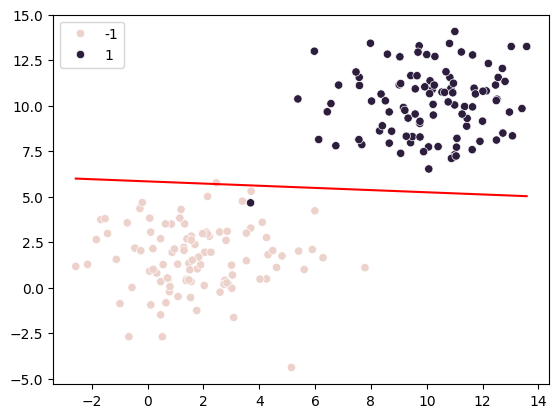

Current Accuracy:87.5
W1:1.8611875453831654, W2: 4.117278860910041, W0:-35


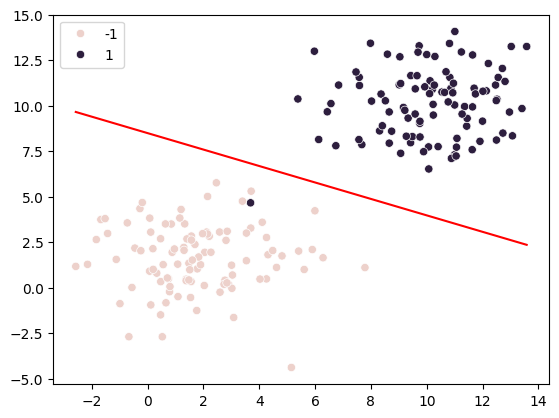

Current Accuracy:98.0
W1:9.060984282637353, W2: 9.210025624900062, W0:-35


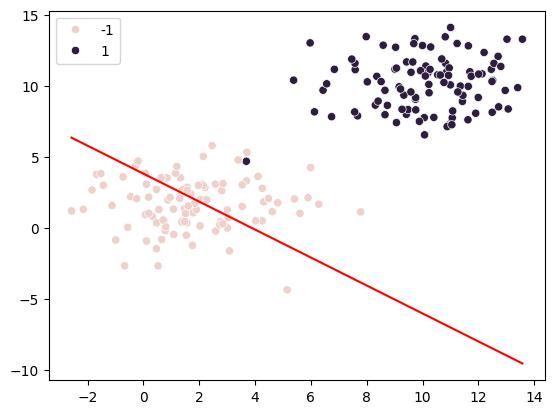

Current Accuracy:95.0
W1:7.622255264608994, W2: 11.170712857475285, W0:-39


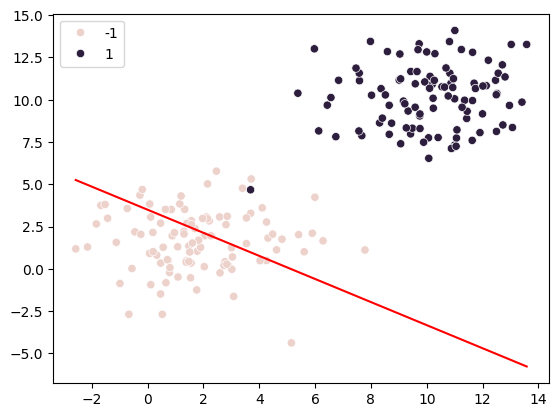

Current Accuracy:97.0
W1:9.560357571001735, W2: 10.137465023235269, W0:-41


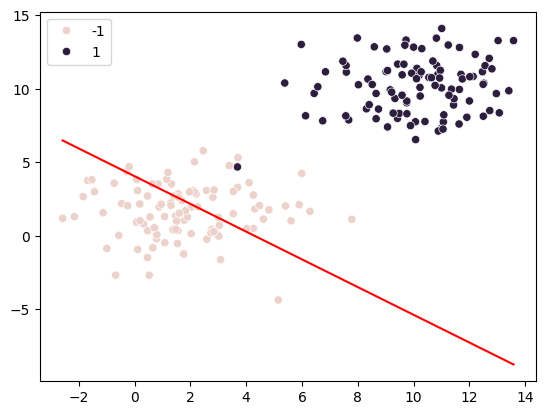

Current Accuracy:95.0
W1:8.121628552973377, W2: 12.098152255810492, W0:-45


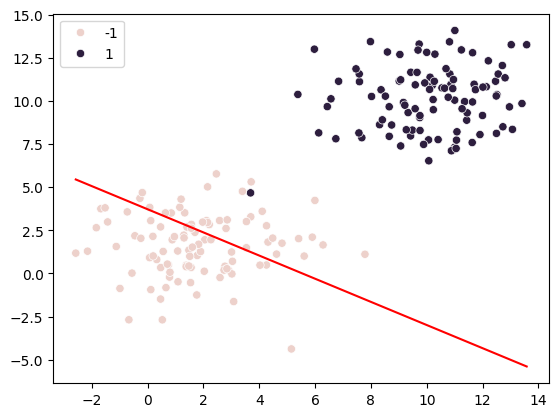

Current Accuracy:97.0
W1:10.059730859366118, W2: 11.064904421570475, W0:-47


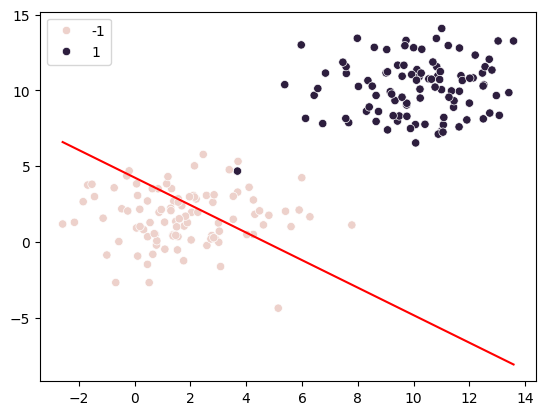

Current Accuracy:95.0
W1:5.0205001827834606, W2: 7.102930640163382, W0:-53


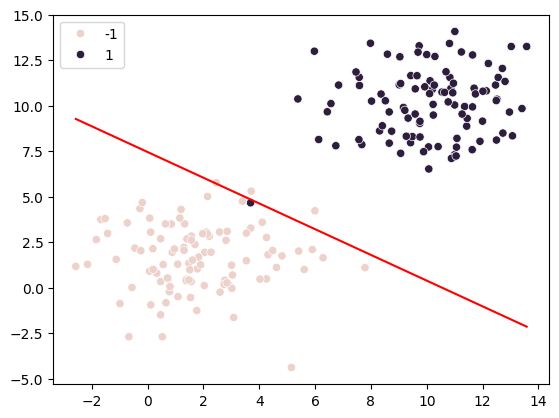

Current Accuracy:92.5
W1:2.069820112054514, W2: 5.881542149266446, W0:-58


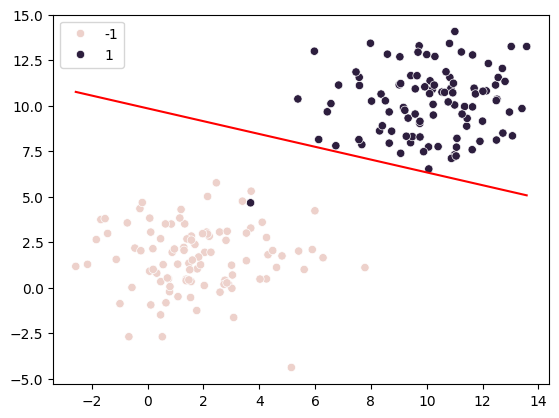

Current Accuracy:99.0
W1:2.362008765594152, W2: 5.791034519041808, W0:-58


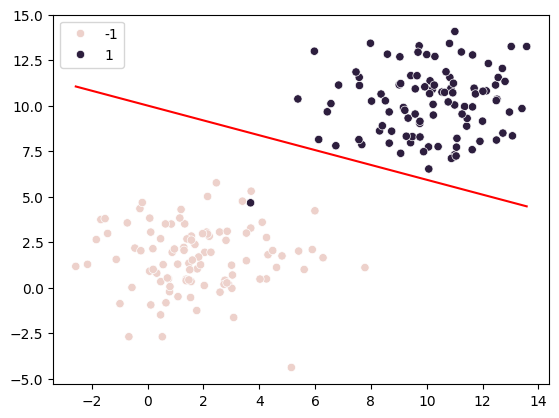

Current Accuracy:97.5
W1:2.8785335335127553, W2: 8.812121887985247, W0:-59


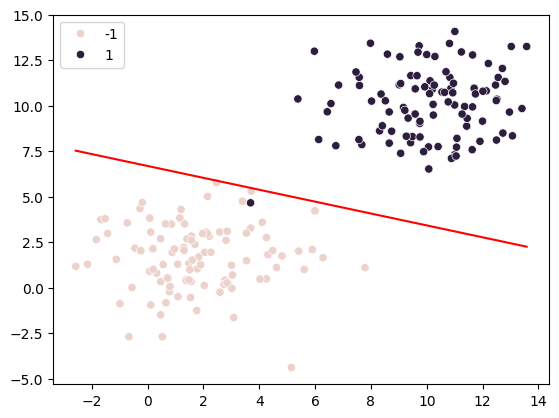

Current Accuracy:98.0
W1:10.078330270766942, W2: 13.904868651975269, W0:-59


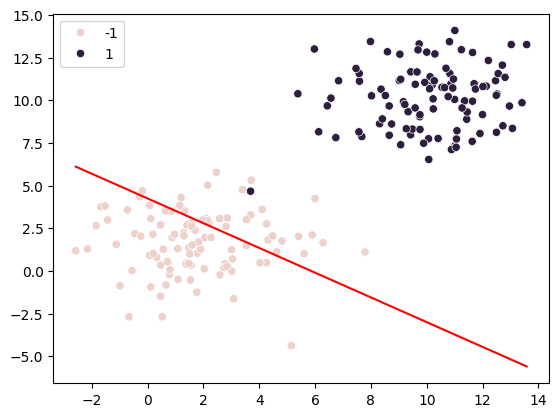

Current Accuracy:98.0
W1:2.570498187859762, W2: 6.928412151792584, W0:-61


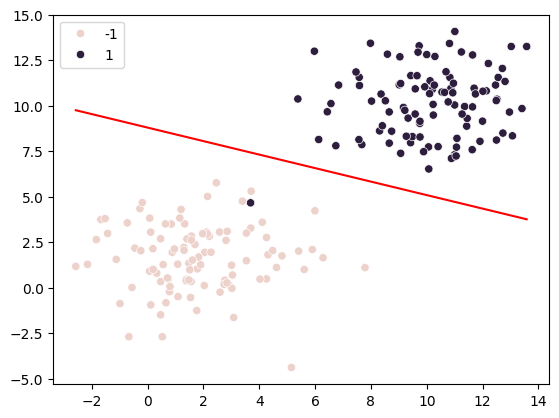

Current Accuracy:97.5
W1:3.0870229557783646, W2: 9.949499520736024, W0:-62


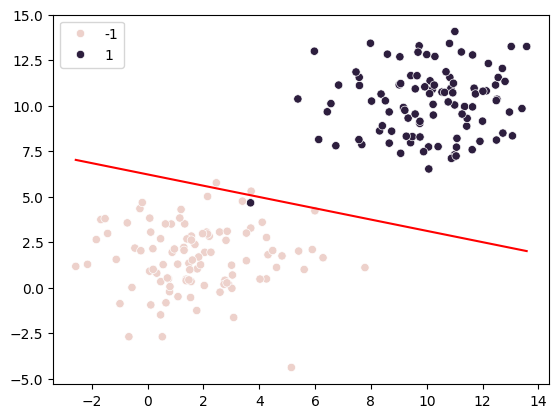

Current Accuracy:94.0
W1:1.9635729643877804, W2: 7.646521932828682, W0:-66


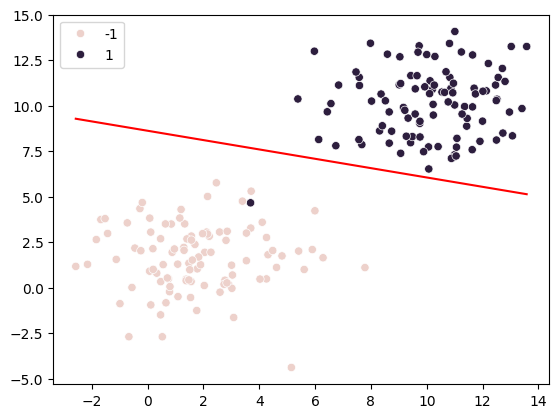

Current Accuracy:99.0
W1:2.2557616179274182, W2: 7.556014302604044, W0:-66


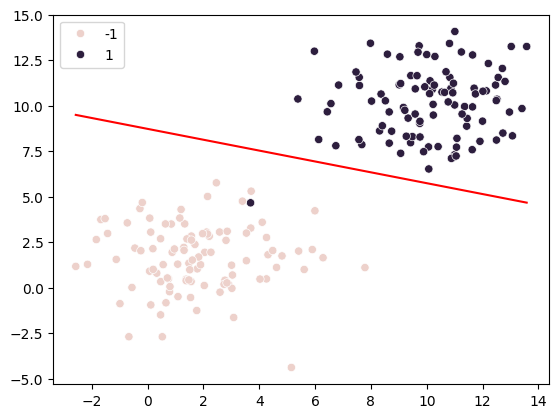

Current Accuracy:99.0
W1:2.547950271467056, W2: 7.465506672379405, W0:-66


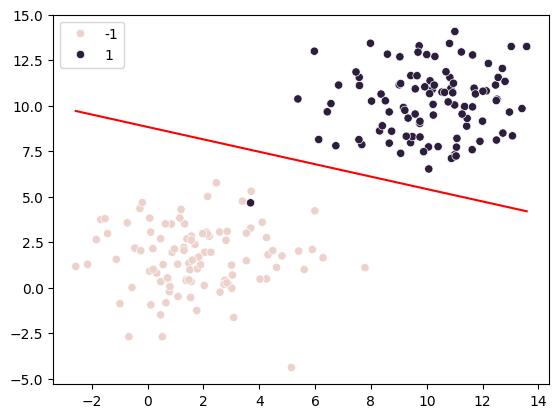

Current Accuracy:99.0
W1:2.840138925006694, W2: 7.374999042154766, W0:-66


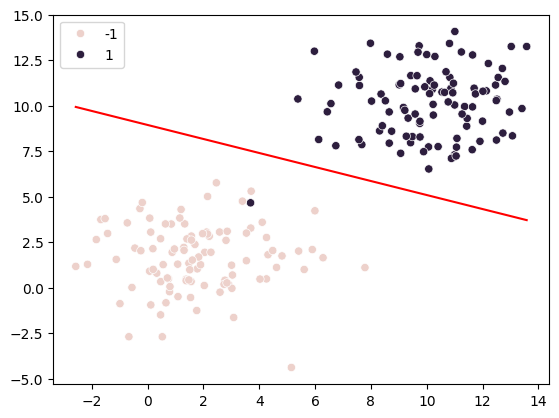

Current Accuracy:99.0
W1:3.132327578546332, W2: 7.2844914119301265, W0:-66


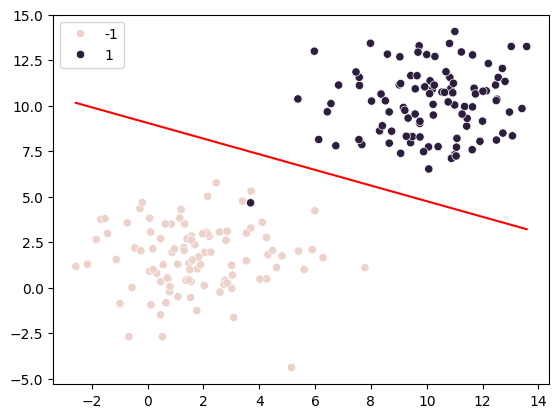

Current Accuracy:97.5
W1:3.648852346464935, W2: 10.305578780873565, W0:-67


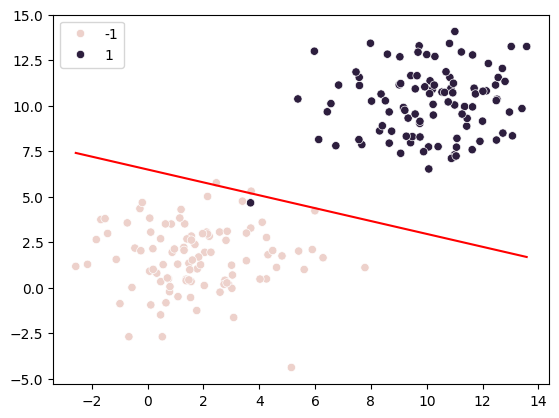

Current Accuracy:94.0
W1:2.525402355074349, W2: 8.002601192966223, W0:-71


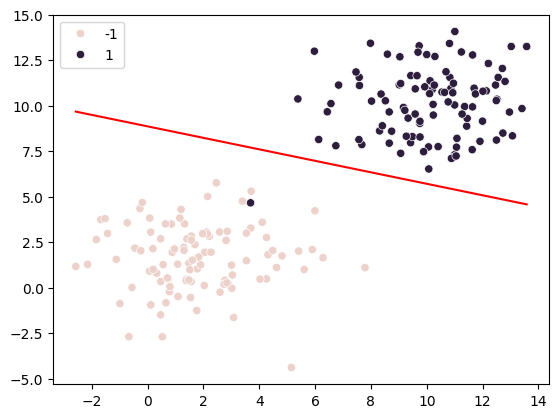

Current Accuracy:99.0
W1:2.817591008613987, W2: 7.912093562741585, W0:-71


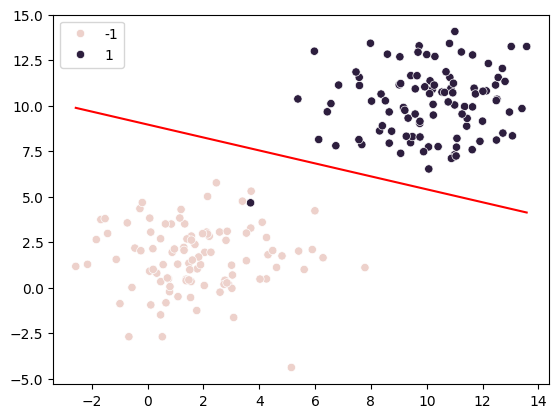

Current Accuracy:99.0
W1:3.109779662153625, W2: 7.821585932516946, W0:-71


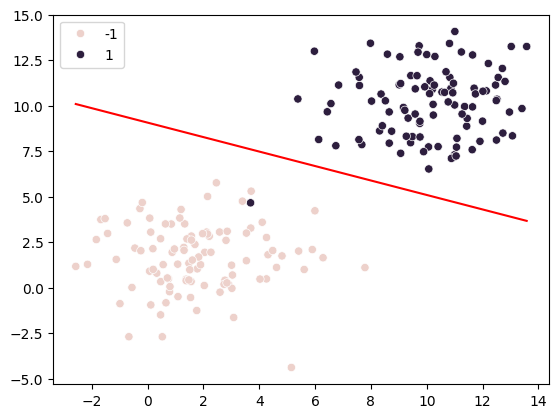

Current Accuracy:99.0
W1:3.4019683156932627, W2: 7.731078302292307, W0:-71


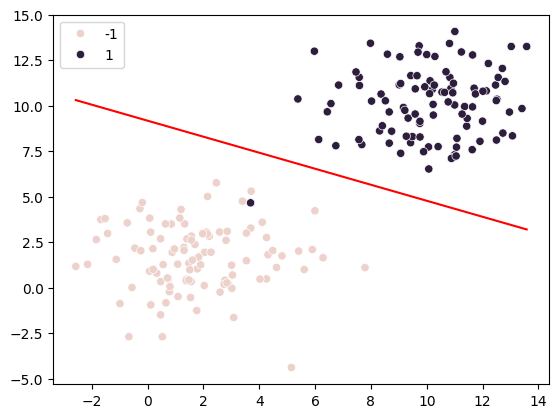

Current Accuracy:99.0
W1:3.6941569692329006, W2: 7.640570672067668, W0:-71


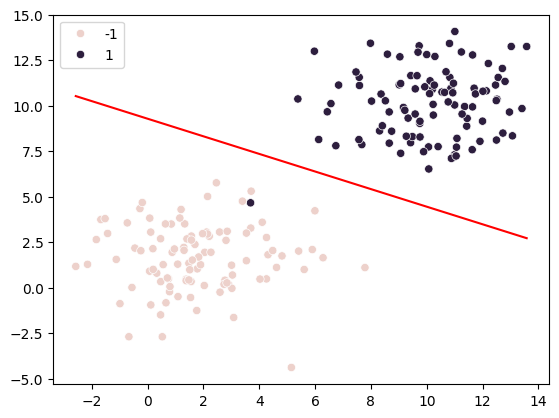

Current Accuracy:97.5
W1:2.0132589735851267, W2: 10.205783547474846, W0:-72


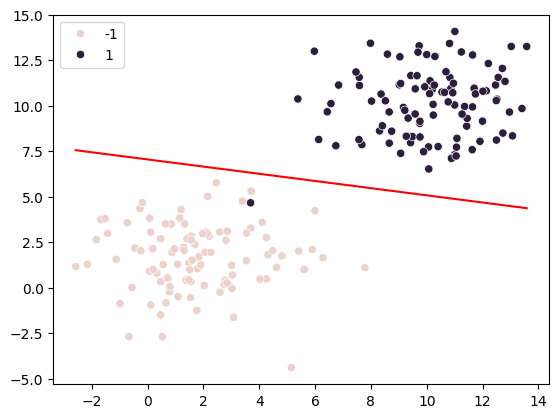

Current Accuracy:99.0
W1:2.3054476271247646, W2: 10.115275917250209, W0:-72


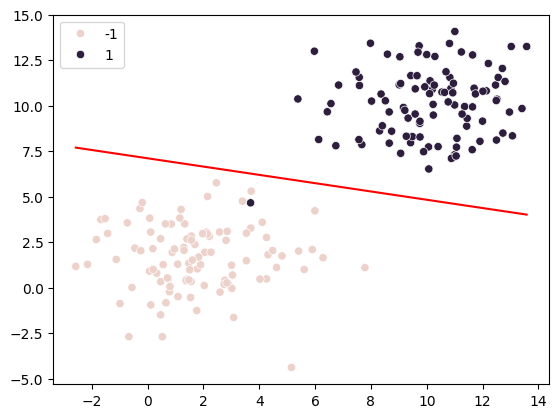

Current Accuracy:99.0
W1:2.5976362806644024, W2: 10.02476828702557, W0:-72


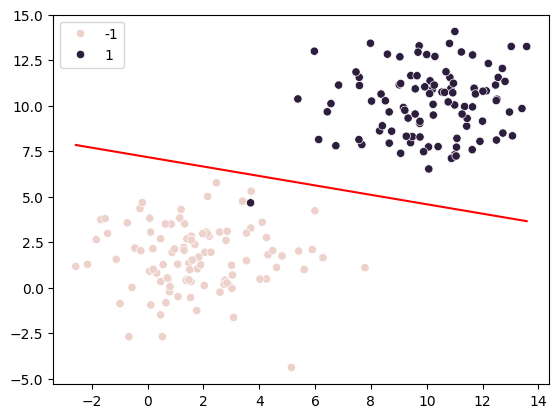

Current Accuracy:99.0
W1:2.8898249342040403, W2: 9.93426065680093, W0:-72


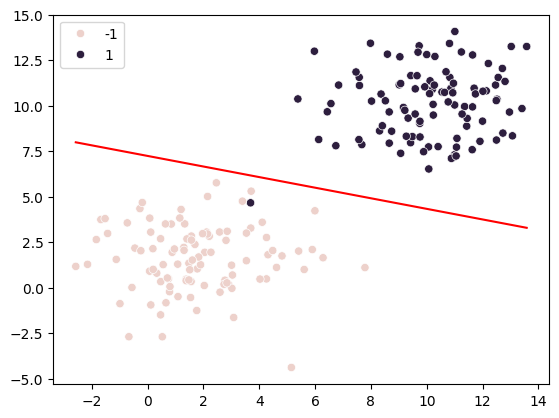

Current Accuracy:99.0
W1:3.182013587743678, W2: 9.843753026576291, W0:-72


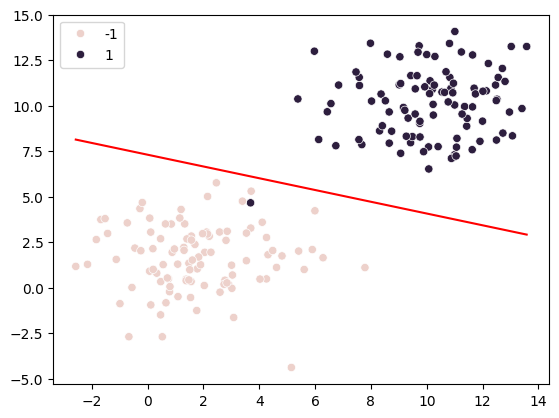

Current Accuracy:99.0
W1:3.474202241283316, W2: 9.753245396351652, W0:-72


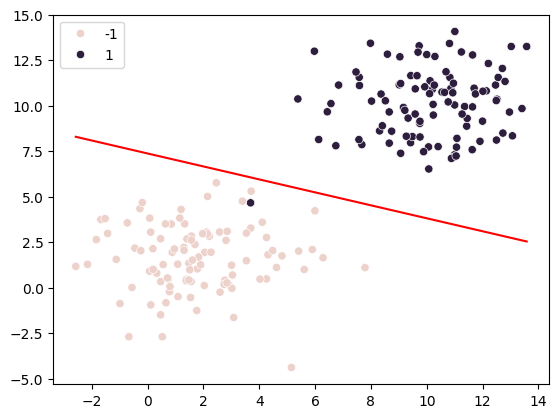

Current Accuracy:99.0
W1:-0.6244641097716821, W2: 13.313675441326021, W0:-72


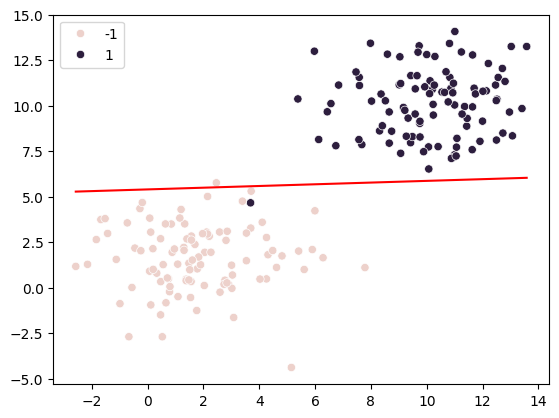

Current Accuracy:96.5
W1:0.7125635386137885, W2: 14.014313628840123, W0:-75


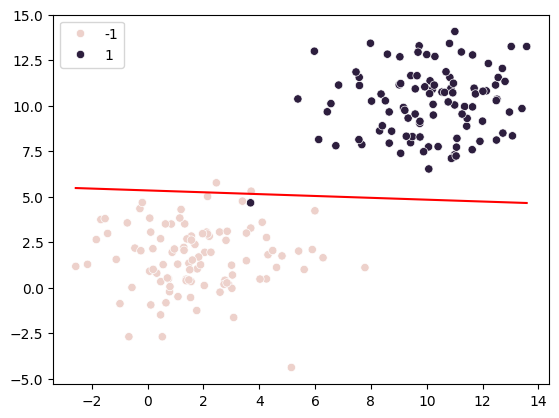

Current Accuracy:95.5
W1:1.5622001964106174, W2: 9.055615535300962, W0:-78


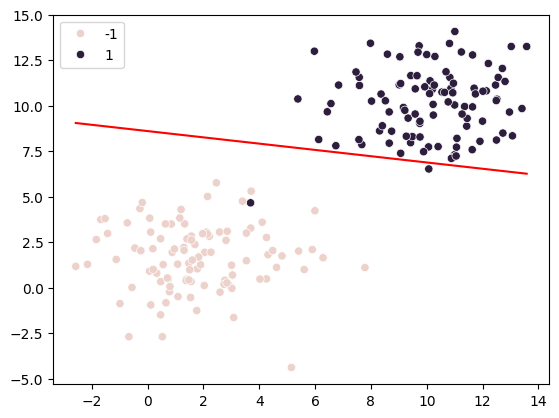

Current Accuracy:99.0
W1:1.8543888499502552, W2: 8.965107905076323, W0:-78


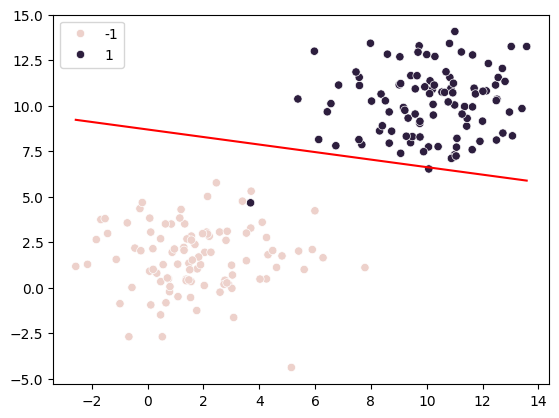

Current Accuracy:99.0
W1:2.146577503489893, W2: 8.874600274851684, W0:-78


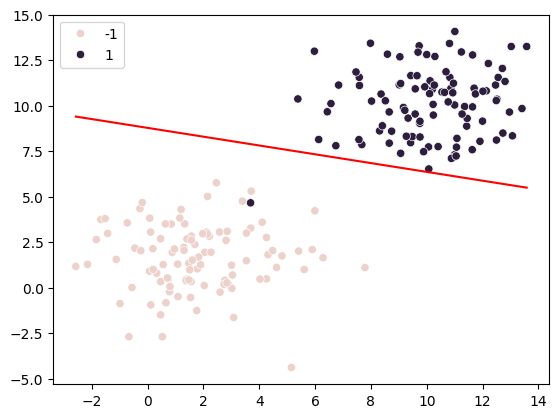

Current Accuracy:99.0
W1:2.438766157029531, W2: 8.784092644627044, W0:-78


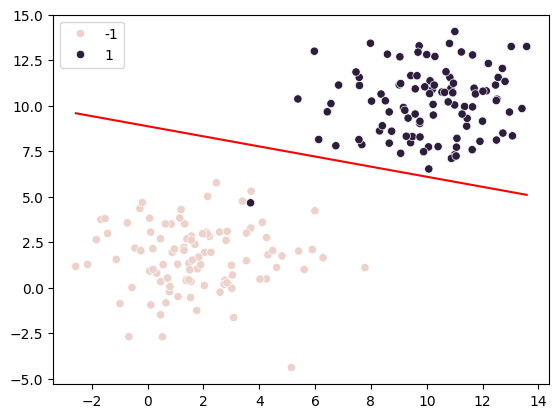

Current Accuracy:99.0
W1:2.730954810569169, W2: 8.693585014402405, W0:-78


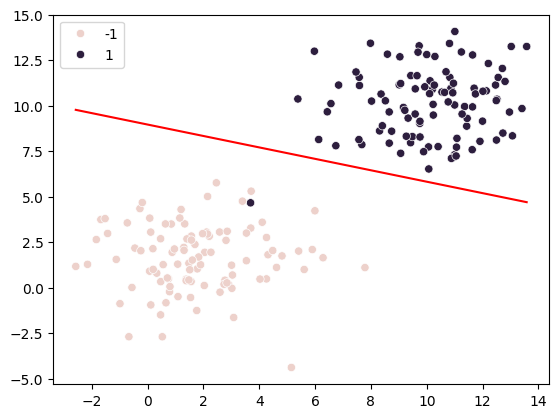

Current Accuracy:99.0
W1:3.0231434641088066, W2: 8.603077384177766, W0:-78


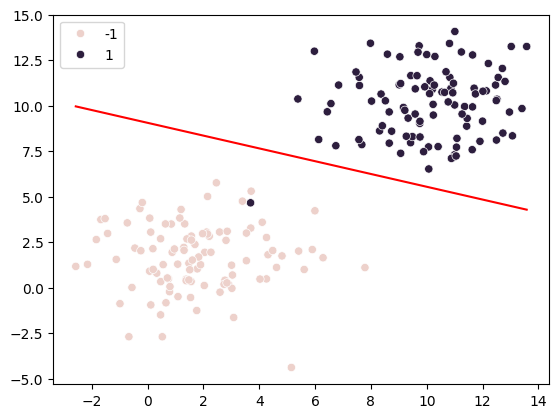

Current Accuracy:99.0
W1:3.3153321176484445, W2: 8.512569753953127, W0:-78


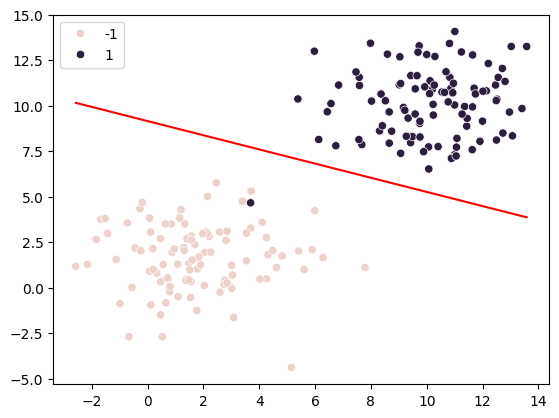

Current Accuracy:99.0
W1:3.6075207711880823, W2: 8.422062123728487, W0:-78


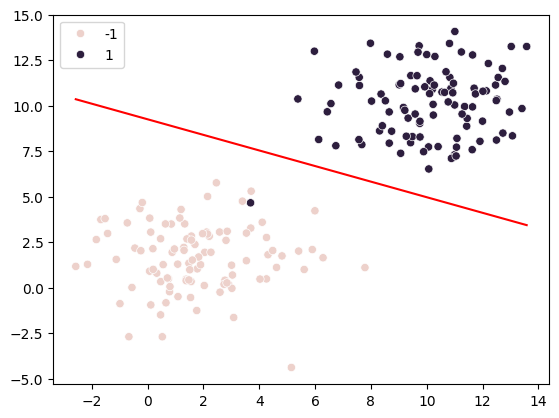

Current Accuracy:99.0
W1:3.89970942472772, W2: 8.331554493503848, W0:-78


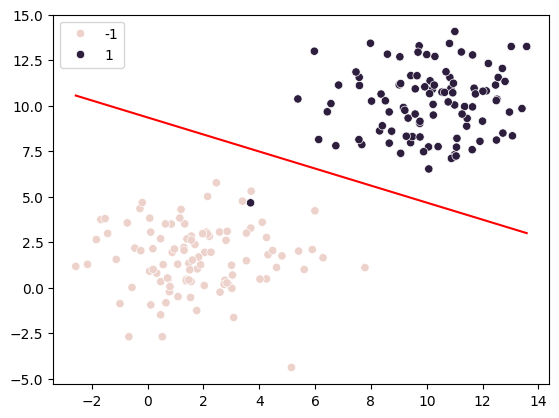

Current Accuracy:99.0
W1:4.191898078267358, W2: 8.241046863279209, W0:-78


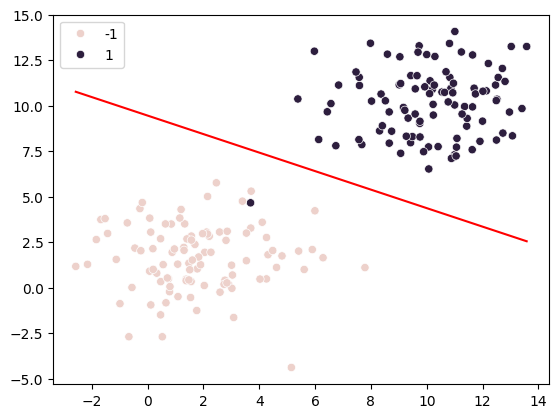

Current Accuracy:99.0
W1:4.484086731806996, W2: 8.15053923305457, W0:-78


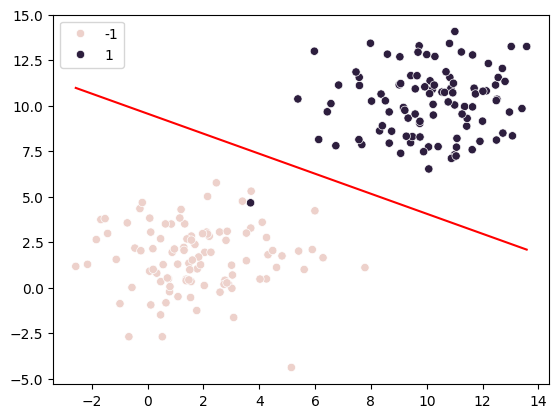

Current Accuracy:99.0
W1:0.3854203807519978, W2: 11.710969278028939, W0:-78


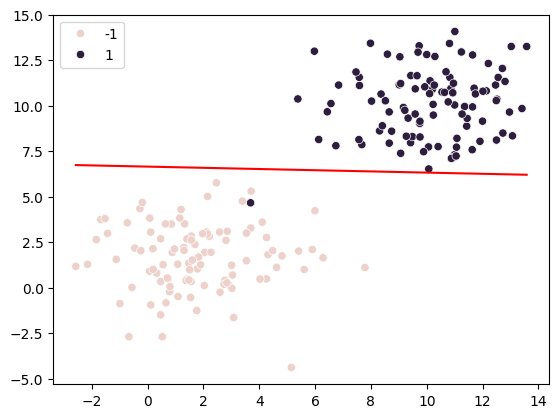

Current Accuracy:99.0
W1:0.6776090342916357, W2: 11.620461647804301, W0:-78


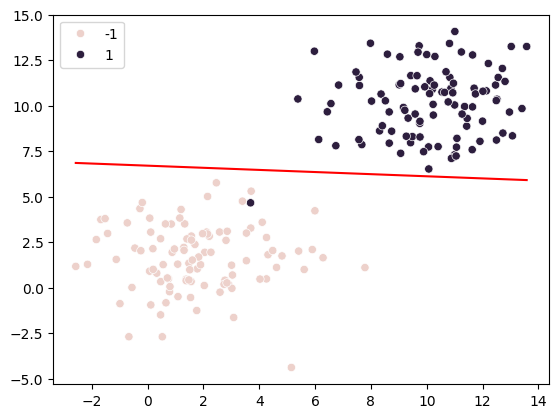

Current Accuracy:99.0
W1:0.9697976878312735, W2: 11.529954017579662, W0:-78


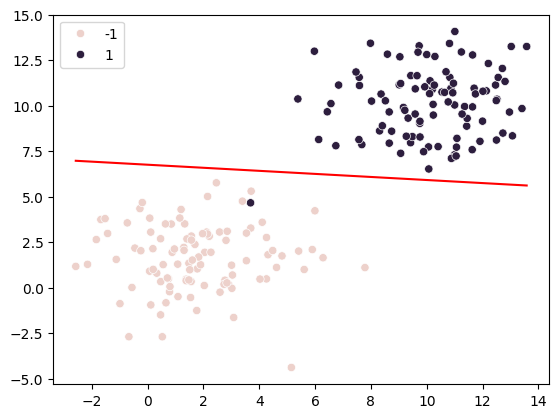

Current Accuracy:99.0
W1:1.2619863413709114, W2: 11.439446387355023, W0:-78


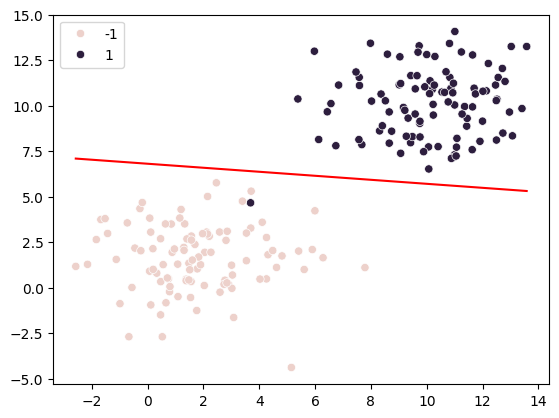

Current Accuracy:99.0
W1:1.5541749949105492, W2: 11.348938757130384, W0:-78


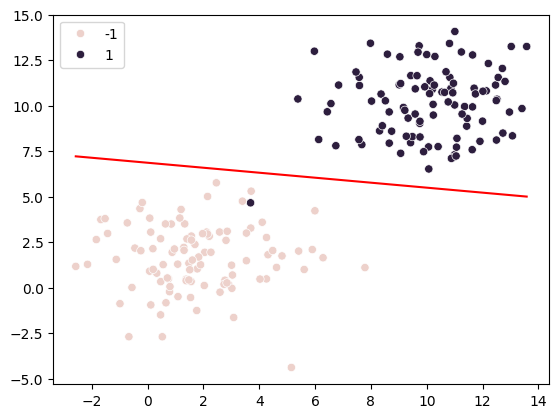

Current Accuracy:99.0
W1:1.846363648450187, W2: 11.258431126905744, W0:-78


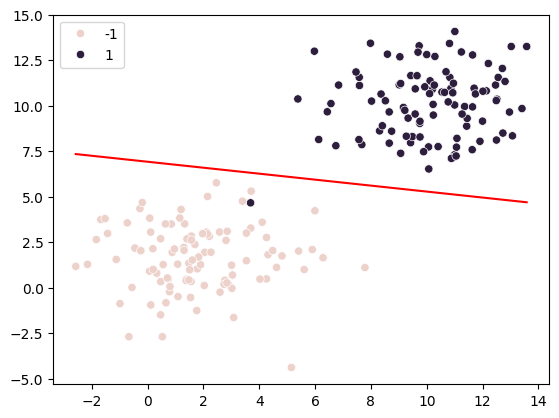

Current Accuracy:99.0
W1:2.138552301989825, W2: 11.167923496681105, W0:-78


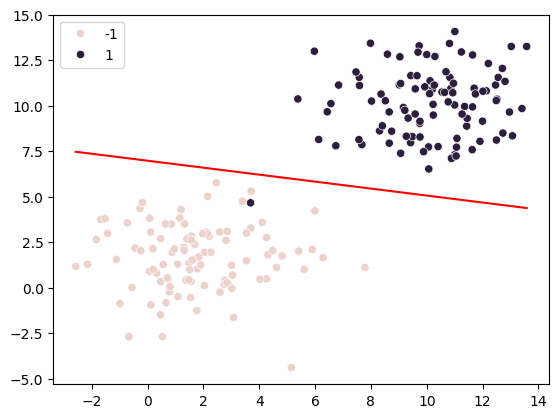

Current Accuracy:99.0
W1:2.430740955529463, W2: 11.077415866456466, W0:-78


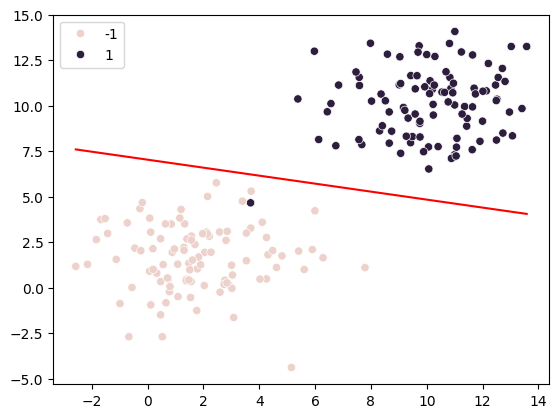

Current Accuracy:99.0
W1:2.7229296090691006, W2: 10.986908236231827, W0:-78


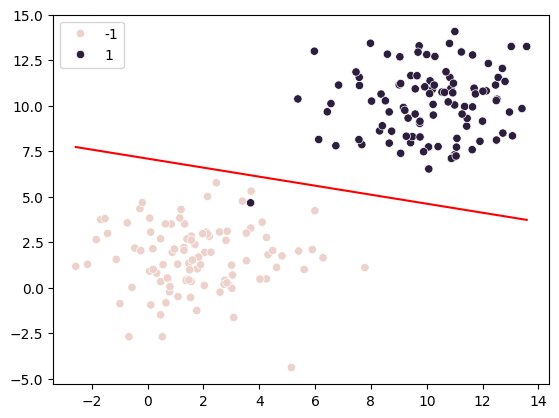

Current Accuracy:99.0
W1:3.0151182626087385, W2: 10.896400606007187, W0:-78


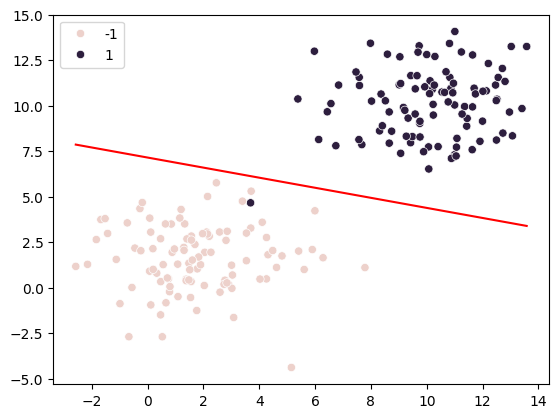

Current Accuracy:99.0
W1:3.3073069161483764, W2: 10.805892975782548, W0:-78


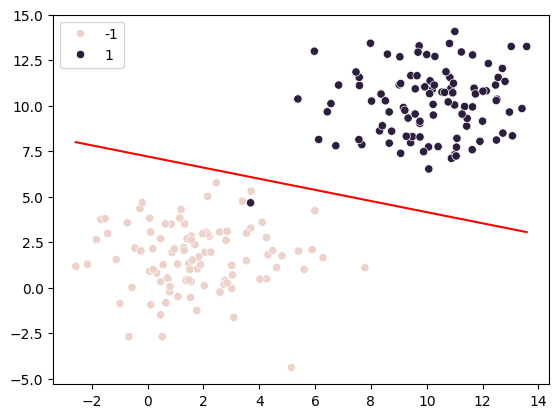

Current Accuracy:99.0
W1:3.599495569688014, W2: 10.715385345557909, W0:-78


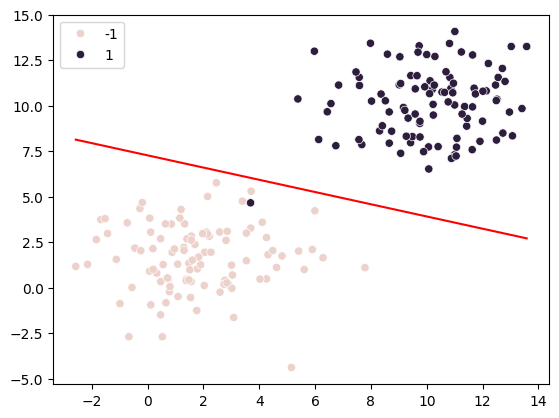

Current Accuracy:99.0
W1:3.891684223227652, W2: 10.62487771533327, W0:-78


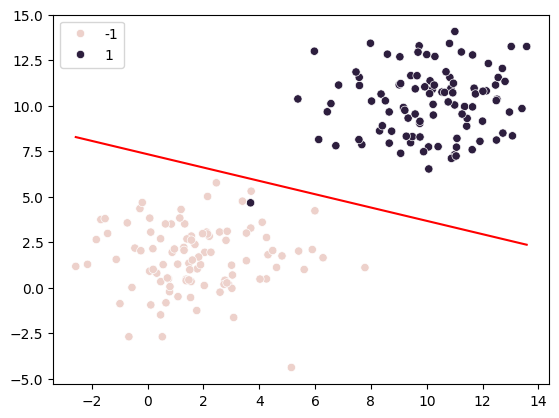

Current Accuracy:99.0
W1:4.18387287676729, W2: 10.53437008510863, W0:-78


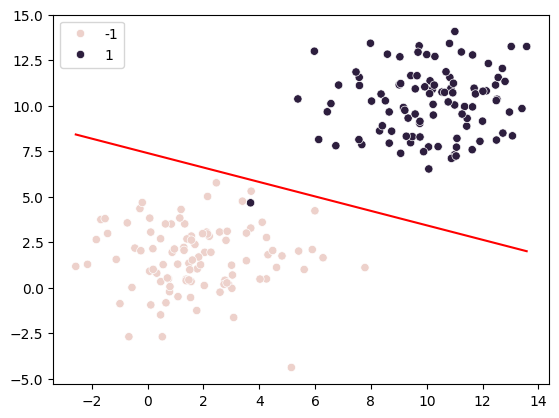

Current Accuracy:99.0
W1:0.08520652571229181, W2: 14.094800130083, W0:-78


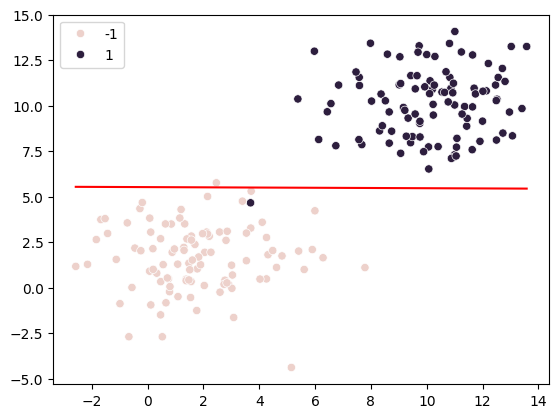

Current Accuracy:95.0
W1:11.986572819976207, W2: 16.381957386577383, W0:-80


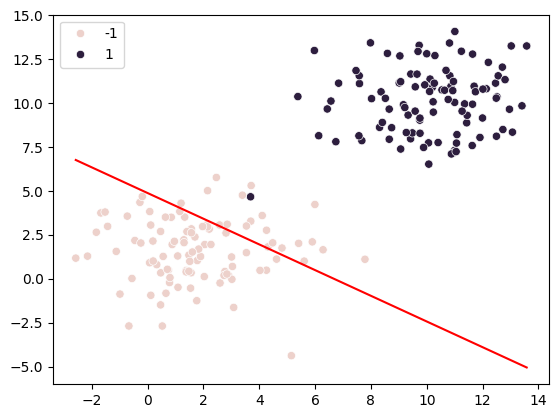

Current Accuracy:98.0
W1:4.478740737069026, W2: 9.405500886394698, W0:-82


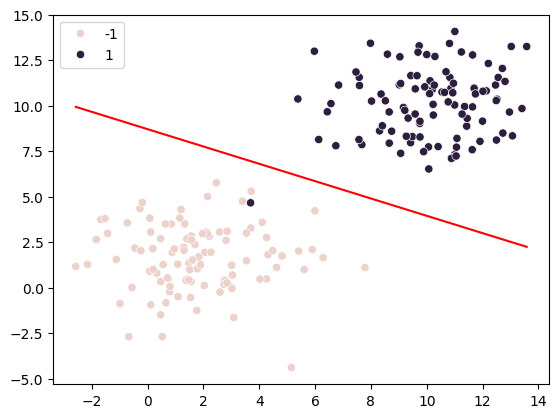

Current Accuracy:99.0
W1:4.770929390608665, W2: 9.314993256170059, W0:-82


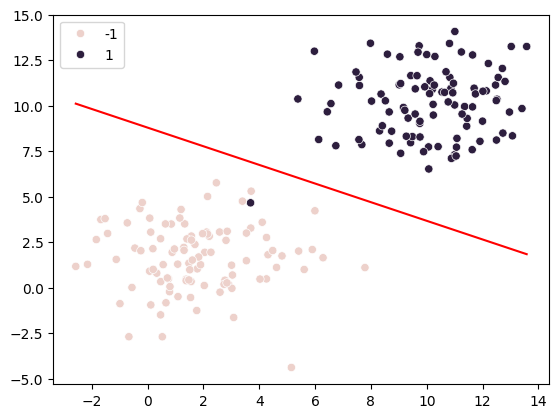

Current Accuracy:99.0
W1:0.6722630395536671, W2: 12.875423301144428, W0:-82


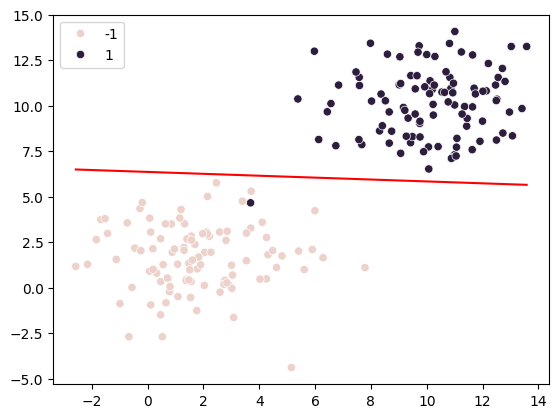

Current Accuracy:99.0
W1:0.9644516930933049, W2: 12.78491567091979, W0:-82


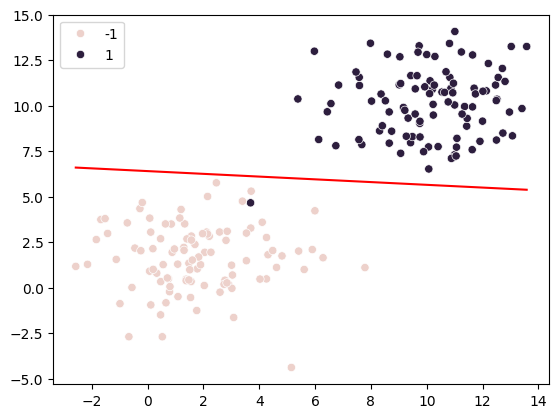

Current Accuracy:99.0
W1:1.2566403466329428, W2: 12.694408040695151, W0:-82


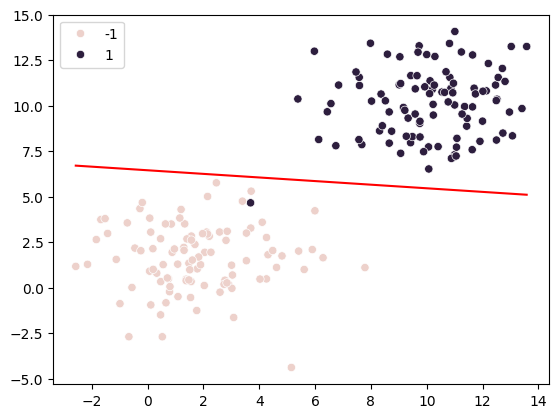

Current Accuracy:99.0
W1:1.5488290001725806, W2: 12.603900410470512, W0:-82


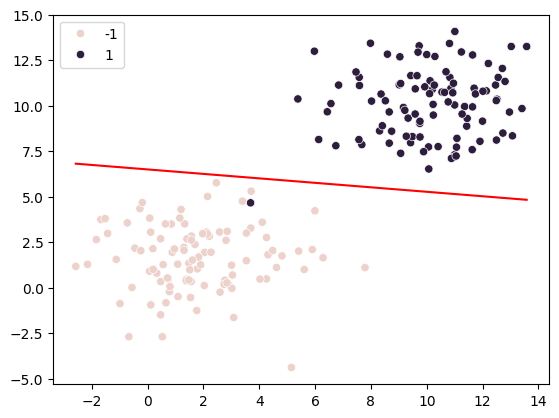

Current Accuracy:99.0
W1:1.8410176537122185, W2: 12.513392780245873, W0:-82


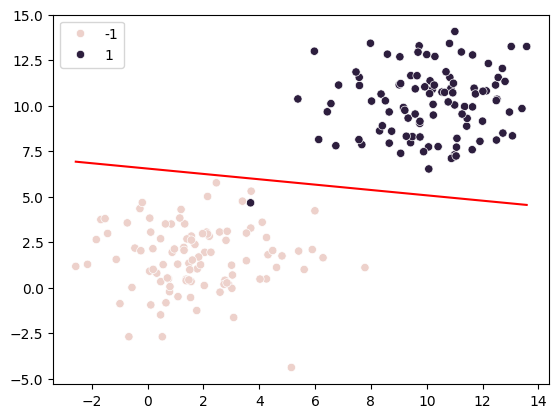

Current Accuracy:99.0
W1:2.1332063072518563, W2: 12.422885150021234, W0:-82


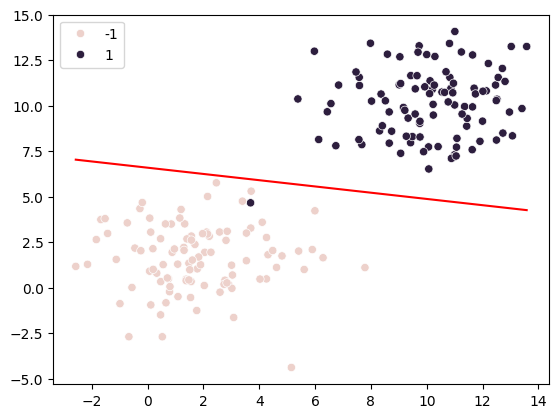

Current Accuracy:99.0
W1:2.425394960791494, W2: 12.332377519796594, W0:-82


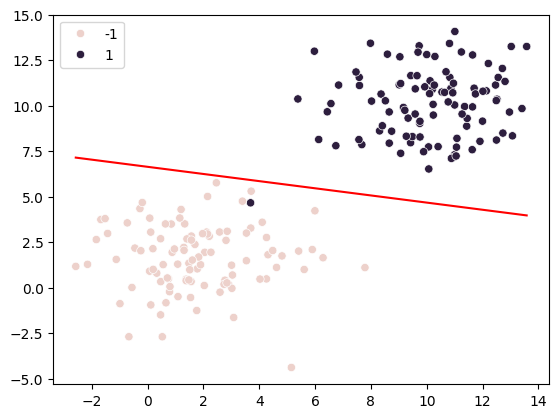

Current Accuracy:99.0
W1:2.717583614331132, W2: 12.241869889571955, W0:-82


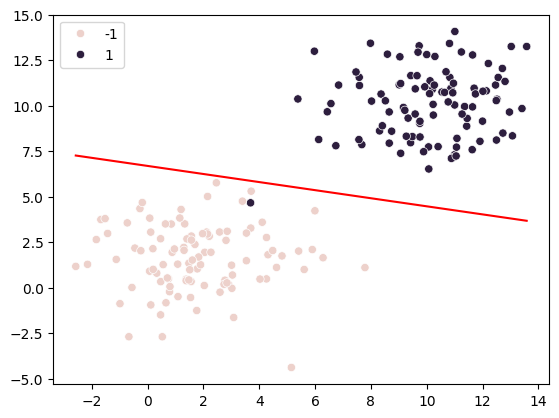

Current Accuracy:99.0
W1:3.00977226787077, W2: 12.151362259347316, W0:-82


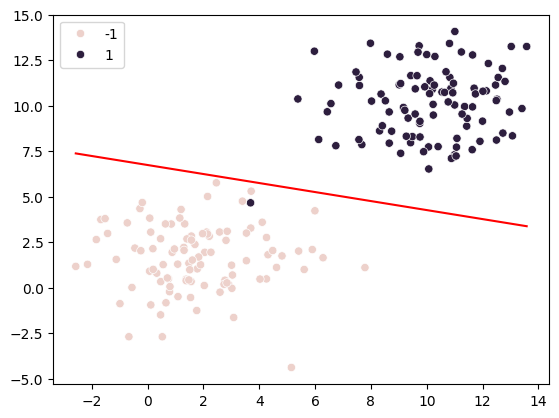

Current Accuracy:99.0
W1:3.3019609214104078, W2: 12.060854629122677, W0:-82


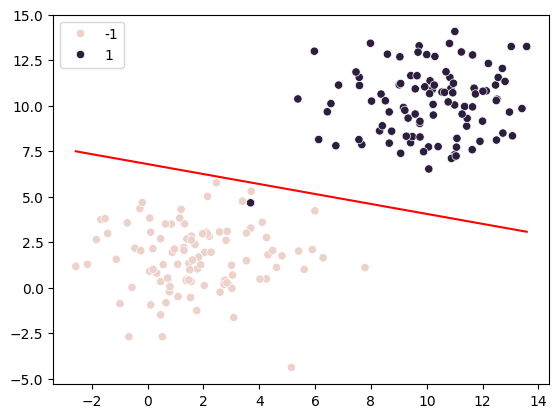

Current Accuracy:99.0
W1:3.5941495749500456, W2: 11.970346998898037, W0:-82


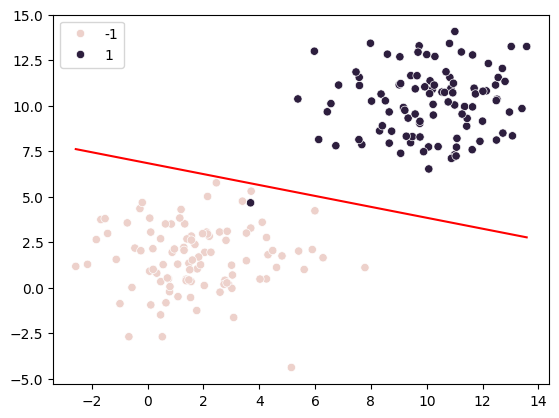

Current Accuracy:99.0
W1:3.8863382284896835, W2: 11.879839368673398, W0:-82


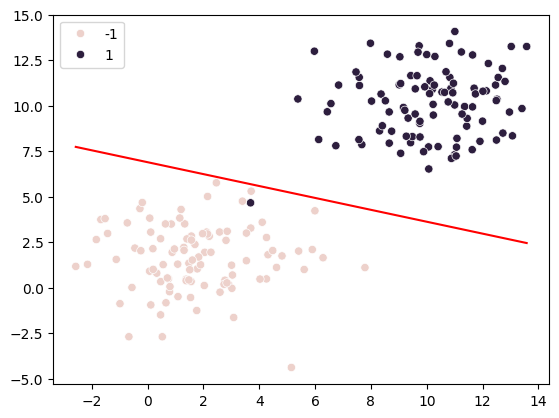

Current Accuracy:99.0
W1:4.178526882029321, W2: 11.789331738448759, W0:-82


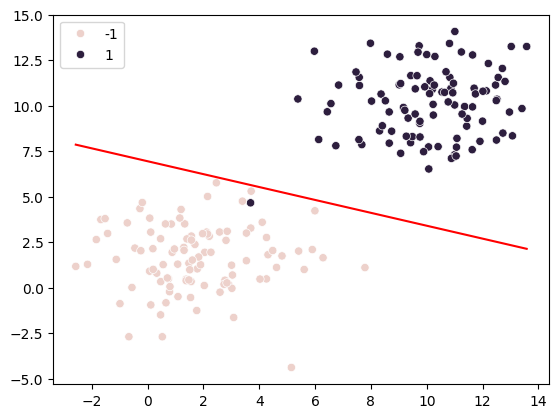

Current Accuracy:99.0
W1:4.470715535568959, W2: 11.69882410822412, W0:-82


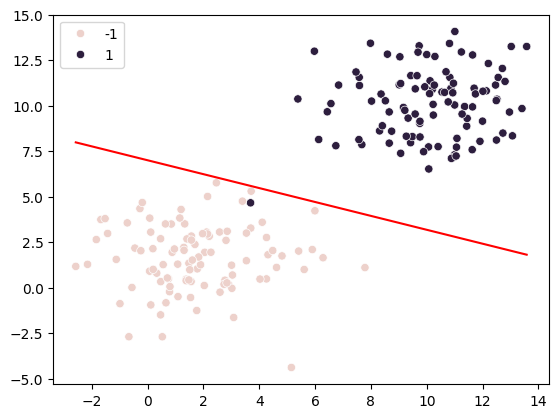

Current Accuracy:99.0
W1:0.3720491845139611, W2: 15.259254153198489, W0:-82


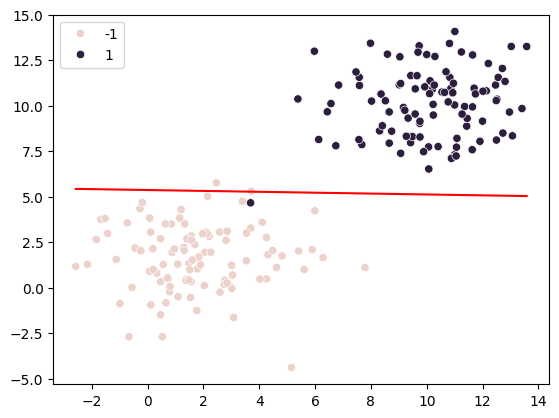

Current Accuracy:96.0
W1:3.712251782225904, W2: 13.931263802642793, W0:-84


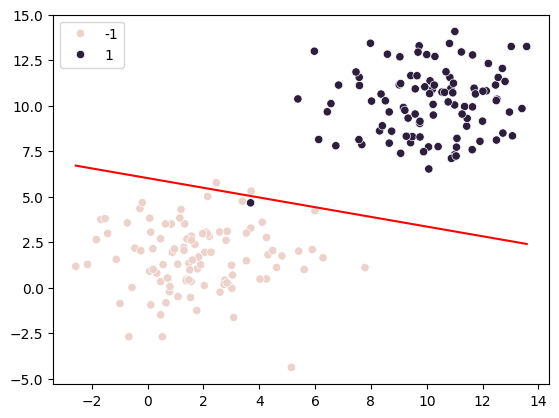

Current Accuracy:96.0
W1:3.987623507948114, W2: 14.999370057015573, W0:-86


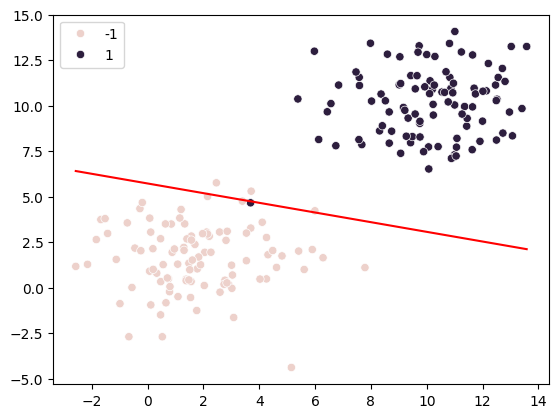

Current Accuracy:96.0
W1:3.6563721222845578, W2: 15.420664574751834, W0:-88


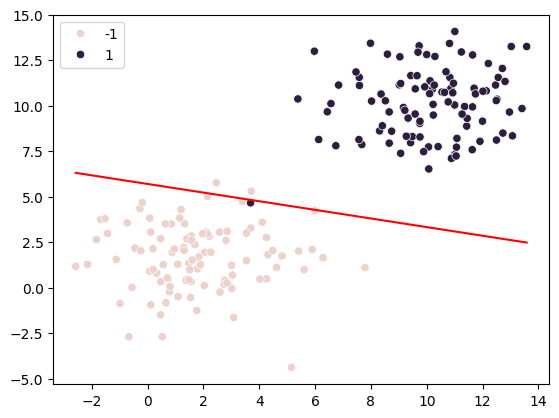

Current Accuracy:97.0
W1:8.030410199061764, W2: 12.928340784150247, W0:-90


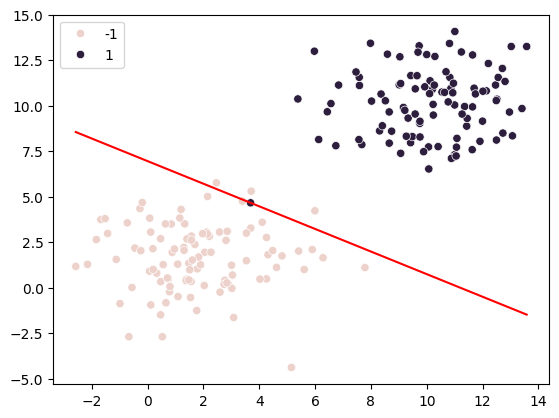

Current Accuracy:99.0
W1:9.255933084294867, W2: 11.827710865505093, W0:-90


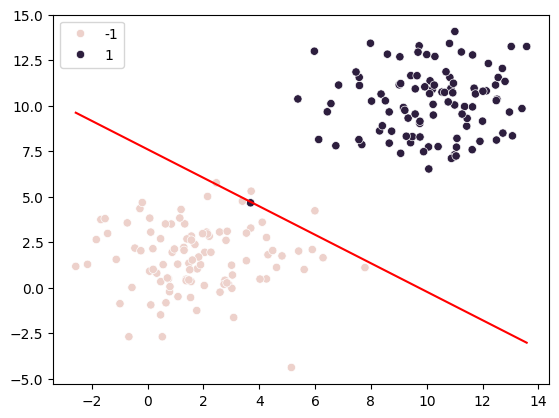

Current Accuracy:97.0
W1:5.1131025034178235, W2: 8.620830378398695, W0:-92


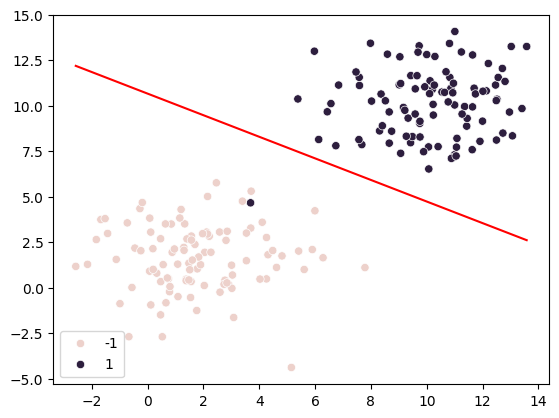

Current Accuracy:99.0
W1:5.405291156957461, W2: 8.530322748174058, W0:-92


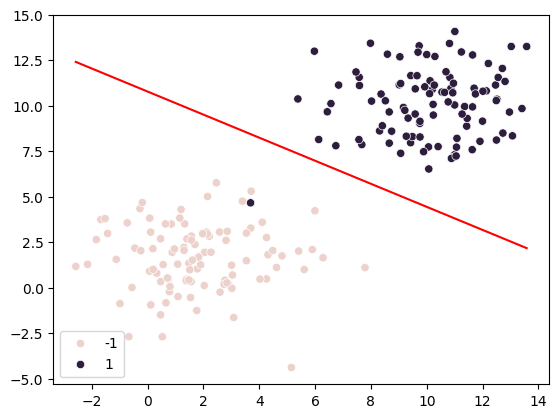

Current Accuracy:99.0
W1:5.697479810497099, W2: 8.439815117949419, W0:-92


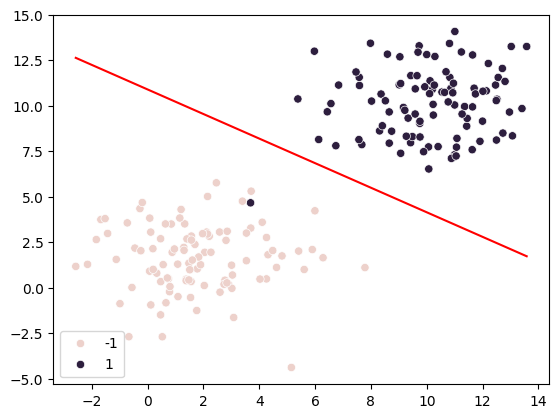

Current Accuracy:99.0
W1:5.989668464036737, W2: 8.34930748772478, W0:-92


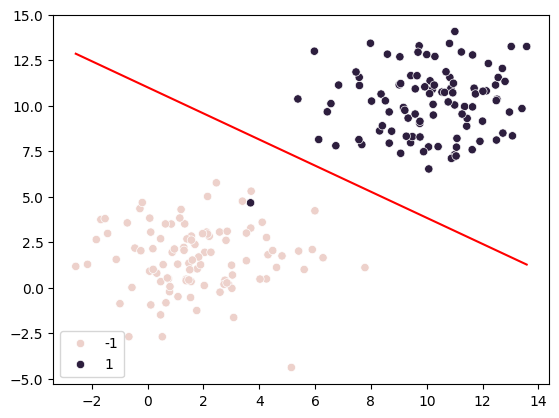

Current Accuracy:99.0
W1:6.281857117576375, W2: 8.25879985750014, W0:-92


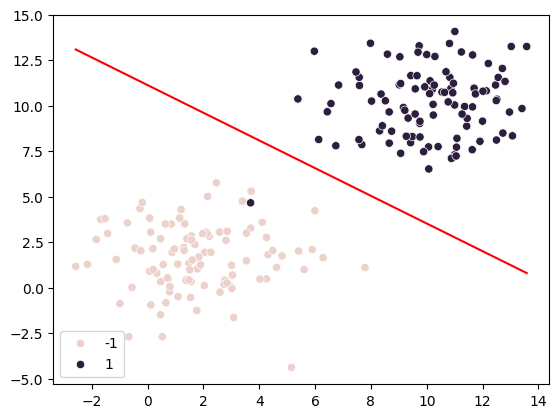

Current Accuracy:99.0
W1:2.183190766521377, W2: 11.81922990247451, W0:-92


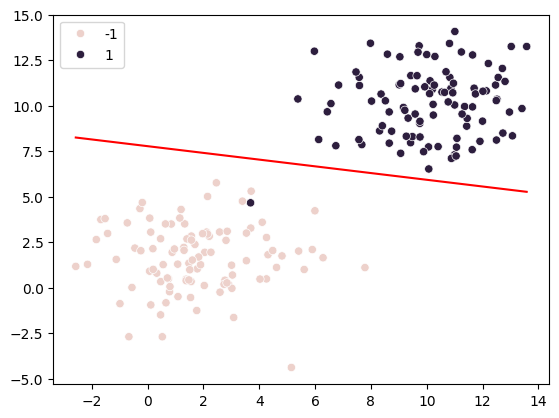

Current Accuracy:99.0
W1:2.4753794200610146, W2: 11.728722272249872, W0:-92


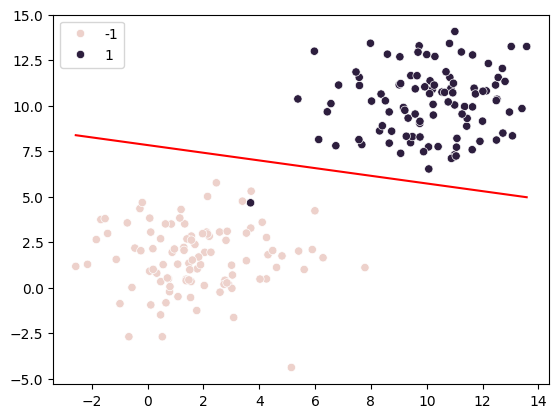

Current Accuracy:99.0
W1:2.7675680736006525, W2: 11.638214642025233, W0:-92


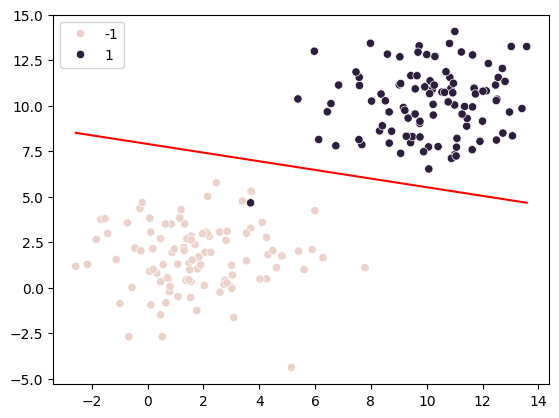

Current Accuracy:99.0
W1:3.0597567271402903, W2: 11.547707011800593, W0:-92


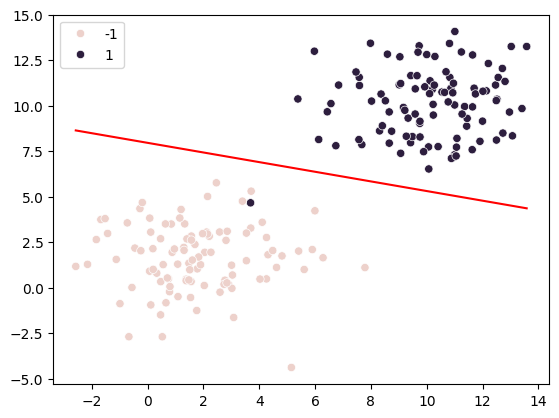

Current Accuracy:99.0
W1:3.351945380679928, W2: 11.457199381575954, W0:-92


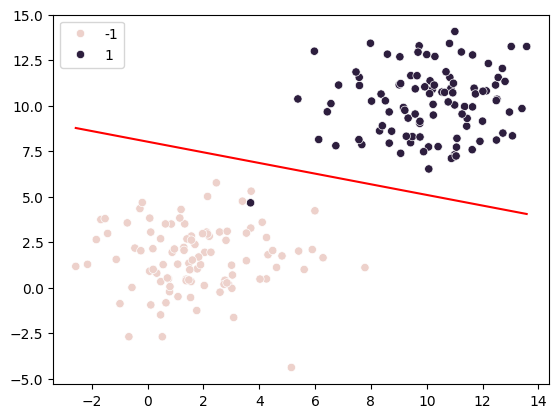

Current Accuracy:99.0
W1:3.644134034219566, W2: 11.366691751351315, W0:-92


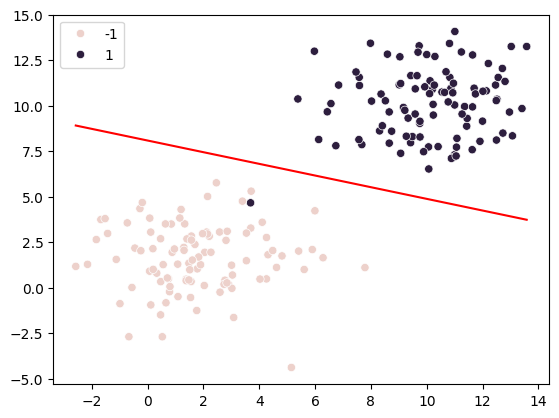

Current Accuracy:99.0
W1:3.936322687759204, W2: 11.276184121126676, W0:-92


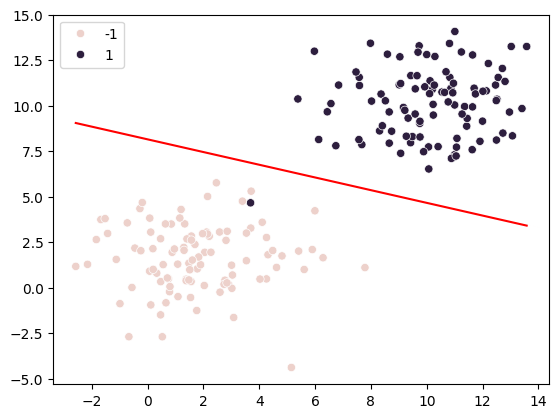

Current Accuracy:99.0
W1:4.228511341298842, W2: 11.185676490902036, W0:-92


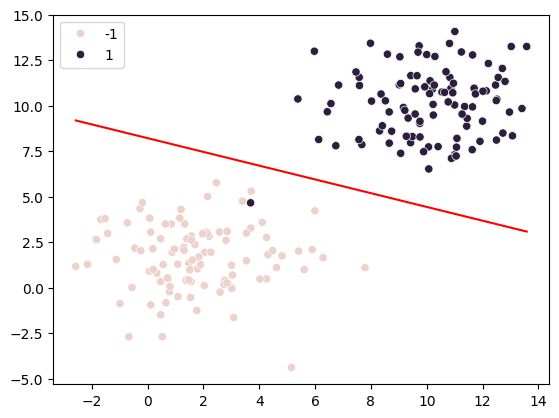

Current Accuracy:99.0
W1:4.52069999483848, W2: 11.095168860677397, W0:-92


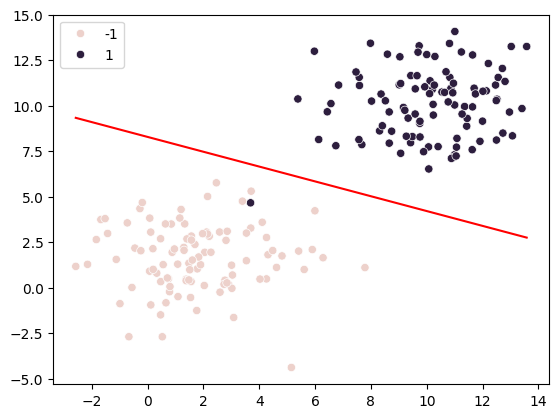

Current Accuracy:99.0
W1:4.8128886483781175, W2: 11.004661230452758, W0:-92


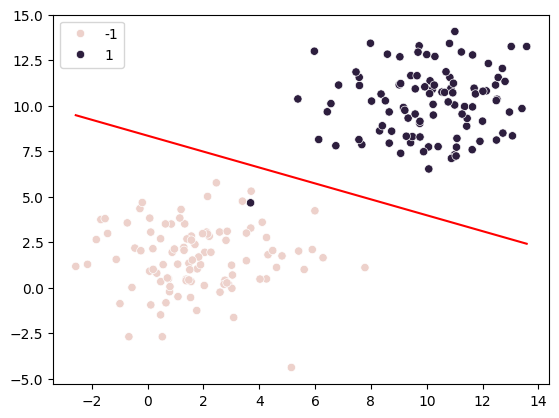

Current Accuracy:99.0
W1:5.105077301917755, W2: 10.914153600228119, W0:-92


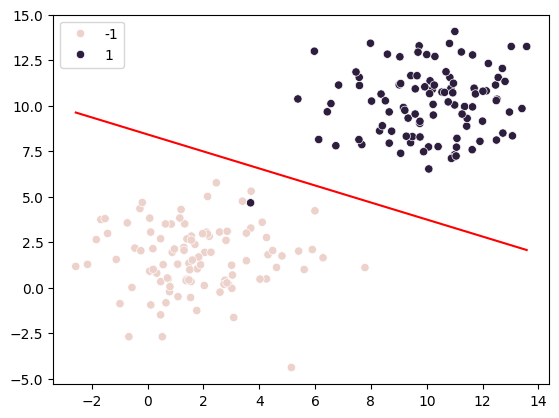

Current Accuracy:99.0
W1:5.397265955457393, W2: 10.82364597000348, W0:-92


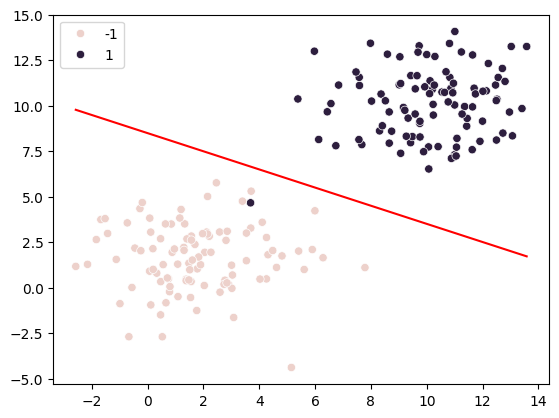

Current Accuracy:99.0
W1:5.689454608997031, W2: 10.73313833977884, W0:-92


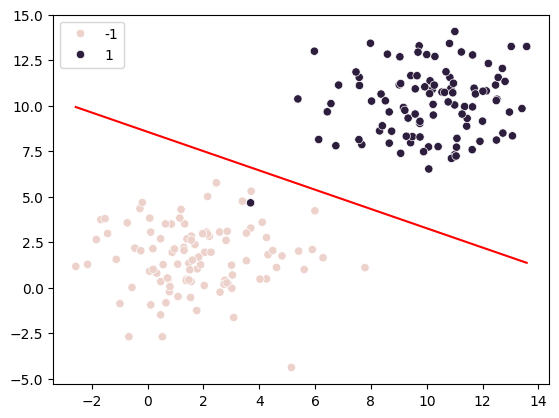

(array([ 5.68945461, 10.73313834]), -92)

In [95]:
perceptron(W,W0,x,y,100)